In [1]:
%load_ext Cython

In [31]:
%%cython
cdef int i = 1
i = <int>0.1
j = <int>0.1

In [37]:
%%cython -a
def example():
    cdef int i, j = 0
    for i in range(10000):
        j += 1
    return j

In [36]:
%%cython
from libc.stdio cimport printf
cdef double a = 0.1
printf("%p", &a)

In [23]:
def python_loop():
    i, j = 0, 0
    for i in range(10000):
        j += 1
    return j

In [27]:
%timeit example()

44.9 ns ± 0.838 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [28]:
%timeit python_loop()

439 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
def ccw(A,B,C):
    return (C.y-A.y) * (B.x-A.x) > (B.y-A.y) * (C.x-A.x)

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

In [45]:
import matplotlib.pyplot as plt

In [59]:
from dataclasses import dataclass

In [60]:
@dataclass
class Point:
    x : int
    y : int

In [46]:
p1 = [(0, 0), (10, 10)]
p2 = [(0, 10), (10, 0)]

In [54]:
list(zip(*p1))

[(0, 10), (0, 10)]

In [55]:
list(zip(*p2))

[(0, 10), (10, 0)]

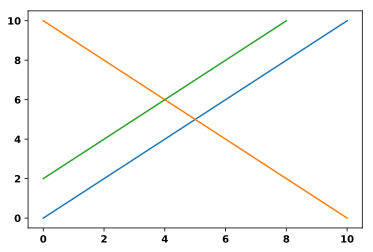

In [82]:
plt.plot(*list(zip(*p1)))
plt.plot(*list(zip(*p2)))
plt.plot(*list(zip(*[[p.x, p.y] for p in [P5, P6]])))

In [64]:
P1 = Point(0, 0)
P2 = Point(10, 10)
P3 = Point(0, 10)
P4 = Point(10, 0)
P5 = Point(0, 2)
P6 = Point(8, 10)

In [63]:
intersect(P1, P2, P3, P4)

True

In [83]:
intersect(P1, P2, P5, P6)

False

In [201]:
%%cython

import math

cdef float segments_distance(int x11,int y11, int x12, int y12, int x21, int y21, int x22, int y22):
    """ distance between two segments in the plane:
    one segment is (x11, y11) to (x12, y12)
    the other is   (x21, y21) to (x22, y22)
    """
    if segments_intersect(x11, y11, x12, y12, x21, y21, x22, y22): return 0
    # try each of the 4 vertices w/the other segment
    distances = []
    distances.append(point_segment_distance(x11, y11, x21, y21, x22, y22))
    distances.append(point_segment_distance(x12, y12, x21, y21, x22, y22))
    distances.append(point_segment_distance(x21, y21, x11, y11, x12, y12))
    distances.append(point_segment_distance(x22, y22, x11, y11, x12, y12))
    return min(distances)

cdef segments_intersect(int x11, int y11, int x12,int  y12, int x21, int y21,int x22, int y22):
    """ whether two segments in the plane intersect:
      one segment is (x11, y11) to (x12, y12)
      the other is   (x21, y21) to (x22, y22)
    """
    dx1 = x12 - x11
    dy1 = y12 - y11
    dx2 = x22 - x21
    dy2 = y22 - y21
    delta = dx2 * dy1 - dy2 * dx1
    if delta == 0: return False  # parallel segments
    s = (dx1 * (y21 - y11) + dy1 * (x11 - x21)) / delta
    t = (dx2 * (y11 - y21) + dy2 * (x21 - x11)) / (-delta)
    return (0 <= s <= 1) and (0 <= t <= 1)


cdef float point_segment_distance(int px, int py,int x1, 
                                  int y1, int x2, int y2):
    dx = x2 - x1
    dy = y2 - y1
    if dx == dy == 0:  # the segment's just a point
        return math.hypot(px - x1, py - y1)

    # Calculate the t that minimizes the distance.
    t = ((px - x1) * dx + (py - y1) * dy) / (dx * dx + dy * dy)

    # See if this represents one of the segment's
    # end points or a point in the middle.
    if t < 0:
        dx = px - x1
        dy = py - y1
    elif t > 1:
        dx = px - x2
        dy = py - y2
    else:
        near_x = x1 + t * dx
        near_y = y1 + t * dy
        dx = px - near_x
        dy = py - near_y

    return math.hypot(dx, dy)

cdef float seg_distance_by_seg(line1, line2):
    p1, p2 = line1
    p3, p4 = line2
    
    return segments_distance(p1.x, p1.y, p2.x, p2.y, p3.x, p3.y, p4.x, p4.y)

cdef int intersect_num_c(lines):
    min_dis = 2
    interect = 0 
    
    cdef int i, j = 0
    
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j: continue
            line_i = lines[i]
            line_j = lines[j]

            if seg_distance_by_seg(line_i, line_j) < min_dis:
                interect += 1
    
    return interect

In [135]:
import random

In [174]:
random_lines = [
    (Point(random.randint(-1000, 1000), random.randint(-1000, 1000)), 
     Point(random.randint(-1000, 1000), random.randint(-1000, 1000)))
     for _ in range(1000)
]    

In [175]:
def draw_seg(p1, p2):
    plt.plot([p1.x, p2.x], [p1.y, p2.y])

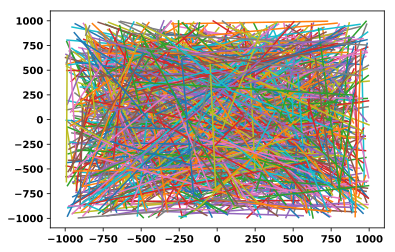

In [176]:
for line in random_lines:
    draw_seg(*line)

In [191]:
%%cython 




Error compiling Cython file:
------------------------------------------------------------
...
        for j in range(len(lines)):
            if i == j: continue
            line_i = lines[i]
            line_j = lines[j]

            if seg_distance_by_seg(line_i, line_j) < min_dis:
              ^
------------------------------------------------------------

/Users/gaominquan/.ipython/cython/_cython_magic_9329d2f863f1febea72553dd861d103e.pyx:14:15: undeclared name not builtin: seg_distance_by_seg


TypeError: object of type 'NoneType' has no len()

In [189]:
%%time 

intersect_num(random_lines)

CPU times: user 2.5 s, sys: 7.33 ms, total: 2.51 s
Wall time: 2.57 s


233068

In [185]:
%%time

min_dis = 2
interect = 0 

for i in range(len(random_lines)):
    for j in range(len(random_lines)):
        if i == j: continue
        line_i = random_lines[i]
        line_j = random_lines[j]

        if seg_distance_by_seg(line_i, line_j) < min_dis:
            interect += 1

CPU times: user 2.65 s, sys: 5.61 ms, total: 2.66 s
Wall time: 2.66 s


In [180]:
interect / 2

1004.0

In [184]:
%%time

min_dis = 2
interect = 0 

for line_i in random_lines:
    for line_j in random_lines:
        if line_i == line_j: continue
        if seg_distance_by_seg(line_i, line_j) < min_dis:
            interect += 1

CPU times: user 2.73 s, sys: 5.2 ms, total: 2.73 s
Wall time: 2.74 s


In [202]:
%%time

intersect_num_c(random_lines)

CPU times: user 2.79 s, sys: 11 ms, total: 2.81 s
Wall time: 2.82 s


233068